In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import torch
plt.style.use("dark_background")

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1234)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

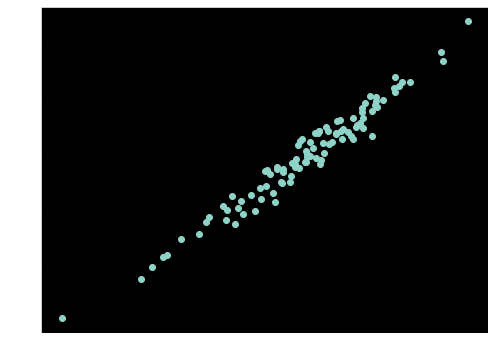

In [3]:
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

In [4]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 1), (20, 1), (80,), (20,))

In [5]:
lr=0.01
n_iters=1000

In [6]:
n_samples,n_features=X_train.shape
print(n_samples,n_features)

80 1


In [7]:
import tenseal as ts

context=ts.context(
        ts.SCHEME_TYPE.CKKS,
        poly_modulus_degree=8192,
        coeff_mod_bit_sizes=[60, 40, 40, 60]
    )
context.generate_galois_keys()
context.global_scale=2**40

In [8]:
enc_X_train=[]
for i in X_train:
    t=ts.ckks_vector(context,i)
    enc_X_train.append(t)

In [9]:
enc_X_test=[]
for i in X_test:
    t=ts.ckks_vector(context,i)
    enc_X_test.append(t)

In [10]:
enc_y_train=ts.ckks_vector(context,y_train)

In [11]:
enc_y_test=ts.ckks_vector(context,y_test)

In [12]:
X_train_t=X_train.T

In [13]:
enc_X_train_t=[]
for i in X_train_t:
    t=ts.ckks_vector(context,i)
    enc_X_train_t.append(t)